# Učitavanje potrebnih biblioteka i podataka

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('info.csv')

# Statistički pregled stanova u Hrvatskoj

## 1. Izračunavanje medijana cijene po kvadratnom metru u svakoj županiji

Prvo smo stvorili novi stupac "Price per sqm" koji predstavlja cijenu po kvadratnom metru dobivenu dijeljenjem cijene stana s njegovom površinom. Zatim smo izdvojili županije koje imaju barem 100 oglasa za stanove kako bismo osigurali reprezentativnost podataka. Rezultate smo prikazali u obliku trakastog dijagrama, gdje je na osi X prikazan medijan cijene po kvadratnom metru, a na osi Y su nazivi županija. Grafički prikaz omogućuje usporedbu medijan cijene po kvadratnom metru među različitim županijama i pruža uvid u regionalne varijacije u cijenama nekretnina.

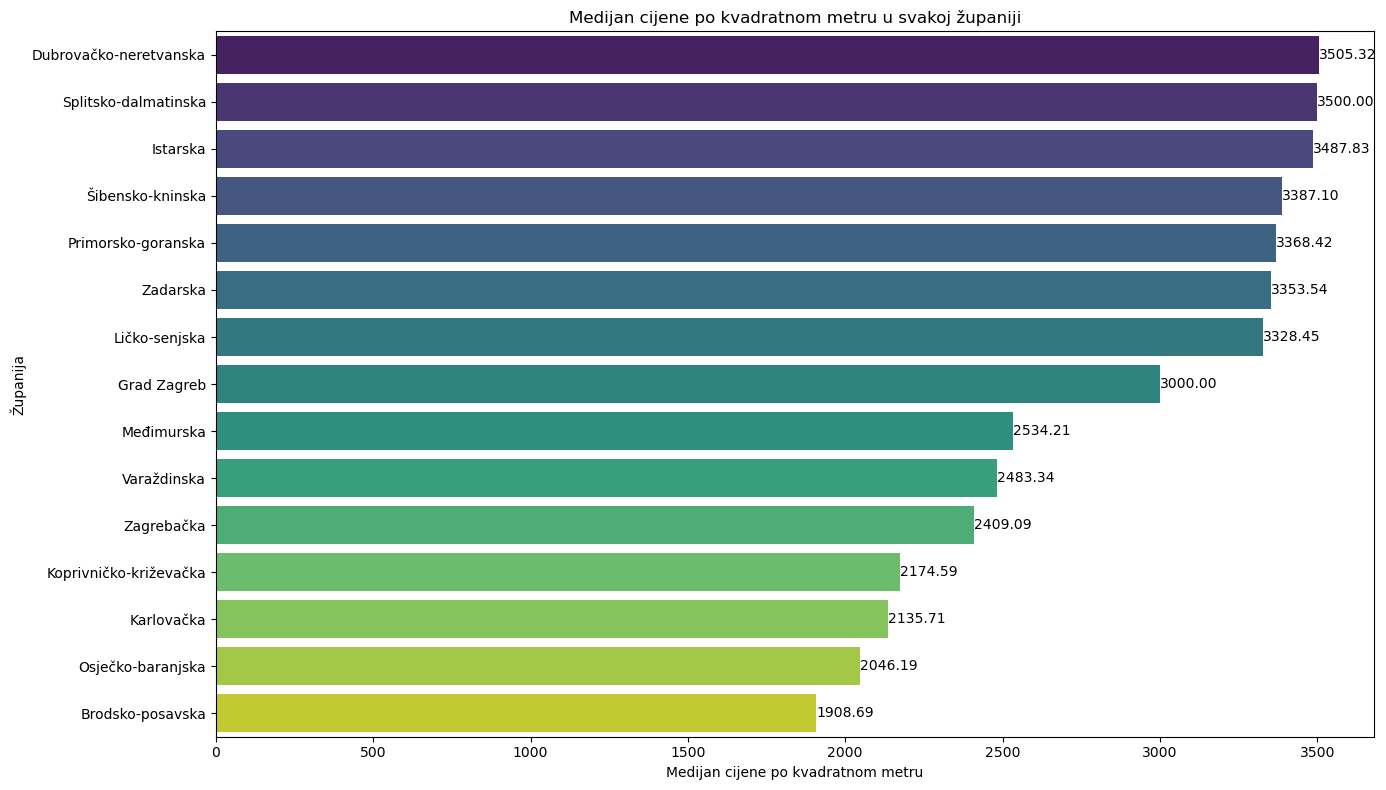

In [3]:
df['Price per sqm'] = df['Price'] / df['Living area']
county_counts = df['County'].value_counts()

valid_counties = county_counts[county_counts >= 100].index
df_filtered = df[df['County'].isin(valid_counties)]

median_price_per_sqm_county = df_filtered.groupby('County')['Price per sqm'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_price_per_sqm_county.values, y=median_price_per_sqm_county.index, palette='viridis')
for index, value in enumerate(median_price_per_sqm_county.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)
plt.xlabel('Medijan cijene po kvadratnom metru')
plt.ylabel('Županija')
plt.title('Medijan cijene po kvadratnom metru u svakoj županiji')
plt.tight_layout()
plt.show()

## 2. Izračunavanje medijana cijene po kvadratnom metru u 10 najskupljih gradova

Filtrirali smo podatke kako bismo uključili samo gradove koji imaju barem 100 oglasa. Zatim smo grupirali podatke po gradovima koristeći medijan cijenu za sortiranje od najskupljeg do 10. najmanjeg skupog grada. Rezultate smo prikazali u obliku trakastog dijagrama, gdje su na osi X prikazane vrijednosti medijana cijene po kvadratnom metru, a na osi Y su nazivi gradova.

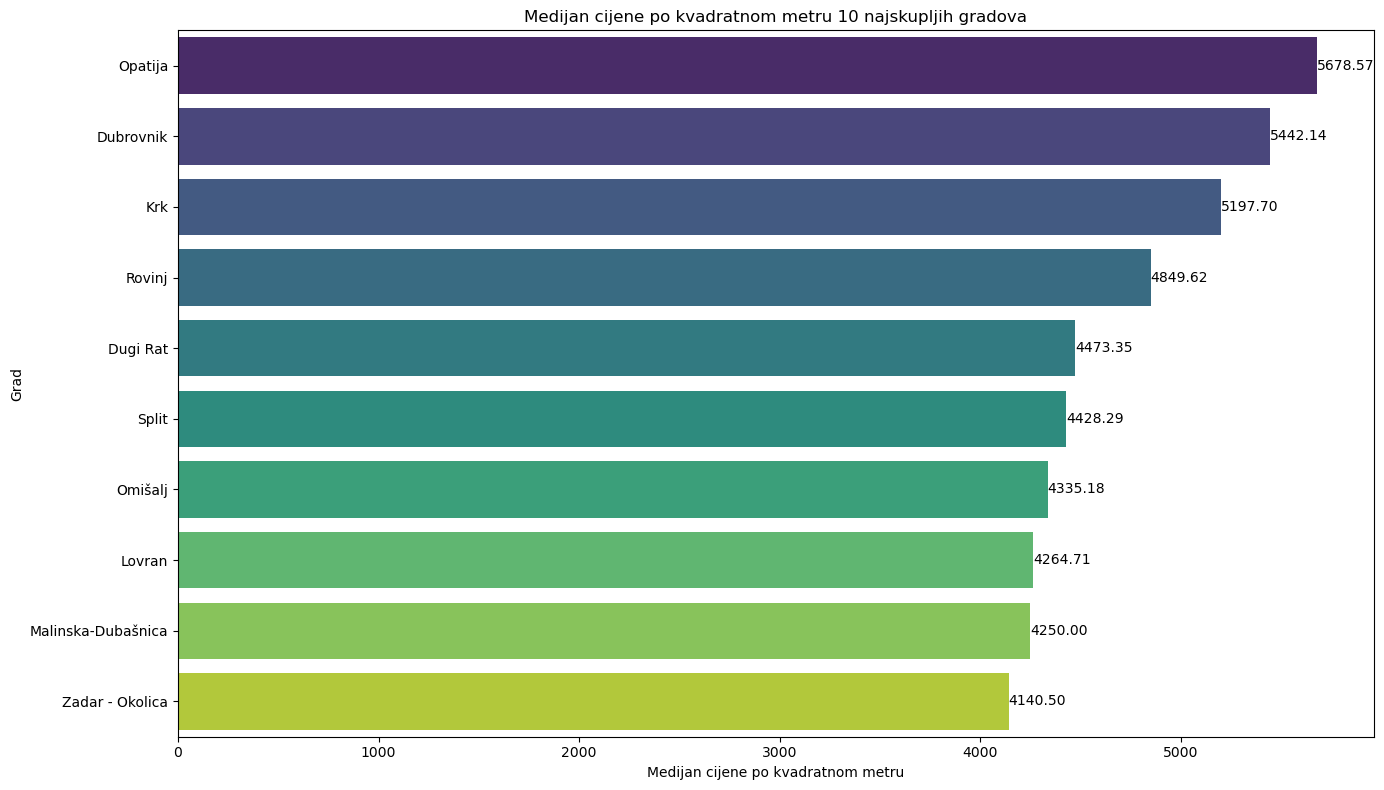

In [4]:
city_counts = df['City'].value_counts()
valid_cities = city_counts[city_counts >= 100].index
df_filtered = df[df['City'].isin(valid_cities)]

median_price_per_sqm_city = df_filtered.groupby('City')['Price per sqm'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_price_per_sqm_city.values, y=median_price_per_sqm_city.index, palette='viridis')
for index, value in enumerate(median_price_per_sqm_city.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)
plt.xlabel('Medijan cijene po kvadratnom metru')
plt.ylabel('Grad')
plt.title('Medijan cijene po kvadratnom metru 10 najskupljih gradova')
plt.tight_layout()
plt.show()

## 3. Izračunavanje medijana cijene po kvadratnom metru u 10 najpopularnijih gradova

Prvo smo identificirali deset gradova s najvećim brojem stanova na Njuškalu. Zatim smo filtrirali podatke kako bismo zadržali samo stanove koji pripadaju tim gradovima. Nakon toga, grupirali smo podatke po gradovima koristeći medijan cijenu za sortiranje od najskupljeg do najmanje skupog. Rezultate smo prikazali koristeći trakasti dijagram koji prikazuje medijan cijene po kvadratnom metru na osi X i nazive gradova na osi Y. Grad Zagreb je županija te nije uvršten među 10 najpopularnijih gradova. Donji Grad i Novi Zagreb-Zapad su unutar Zagreba te su u Njuškalu uvršteni kao gradovi unutar Grada Zagreba.

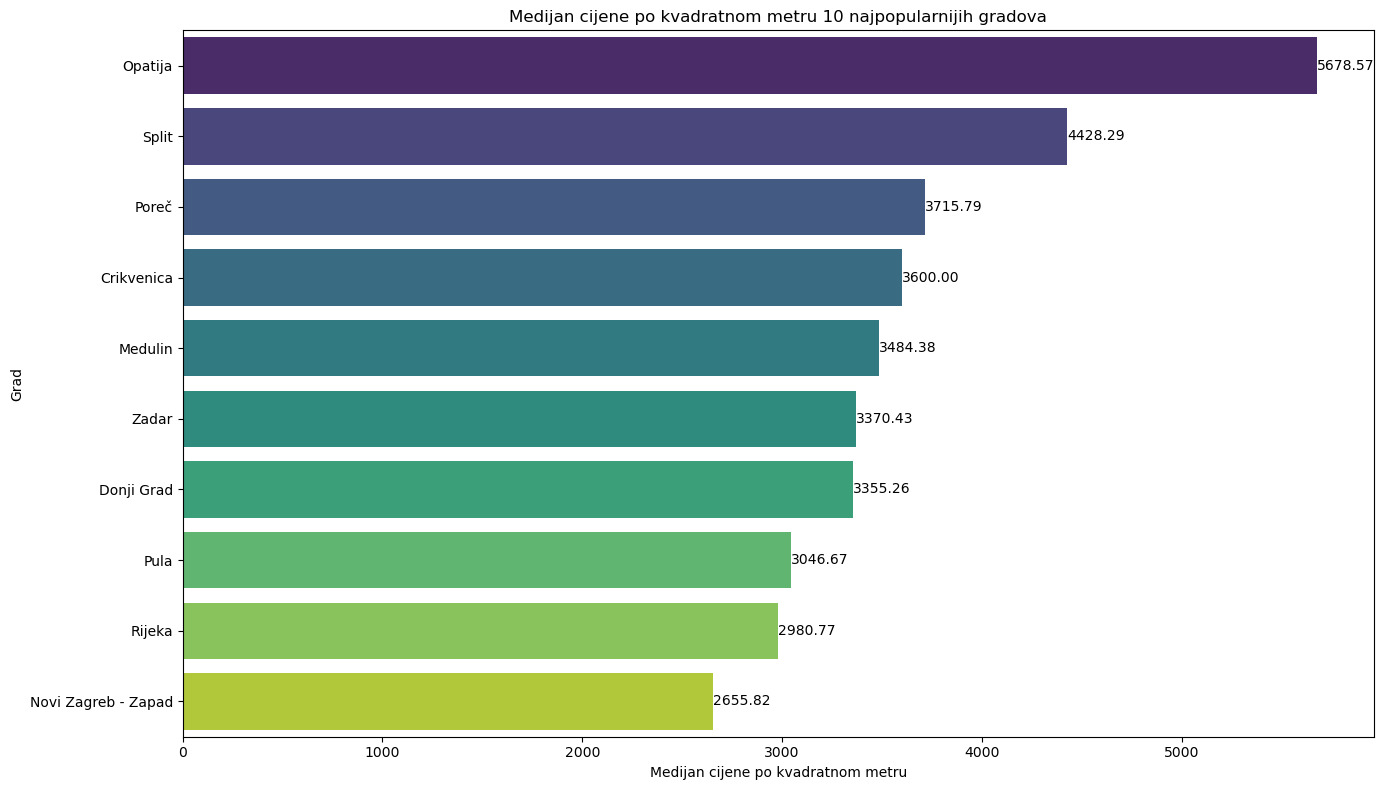

In [5]:
city_counts = df['City'].value_counts().sort_values(ascending=False).head(10)
df_filtered = df[df['City'].isin(city_counts.index)]

median_price_per_sqm_city = df_filtered.groupby('City')['Price per sqm'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_price_per_sqm_city.values, y=median_price_per_sqm_city.index, palette='viridis')
for index, value in enumerate(median_price_per_sqm_city.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)
plt.xlabel('Medijan cijene po kvadratnom metru')
plt.ylabel('Grad')
plt.title('Medijan cijene po kvadratnom metru 10 najpopularnijih gradova')
plt.tight_layout()
plt.show()

## 4. Broj objavljenih stanova u travnju

Najprije smo pretvorili stupac s datumima u format datuma i dodali nove stupce za godinu, mjesec i dan. Zatim smo filtrirali podatke kako bismo dobili samo one koji se odnose na travanj 2024. godine. Broj objavljenih stanova za svaki dan u mjesecu prikazali smo u obliku grafa stupčastog dijagrama. Na osi X su datumi, dok su na osi Y broj objavljenih oglasa. Graf omogućuje vizualizaciju trendova u objavljivanju stanova tijekom mjeseca i identificiranje dana s najvećim brojem objavljenih oglasa.

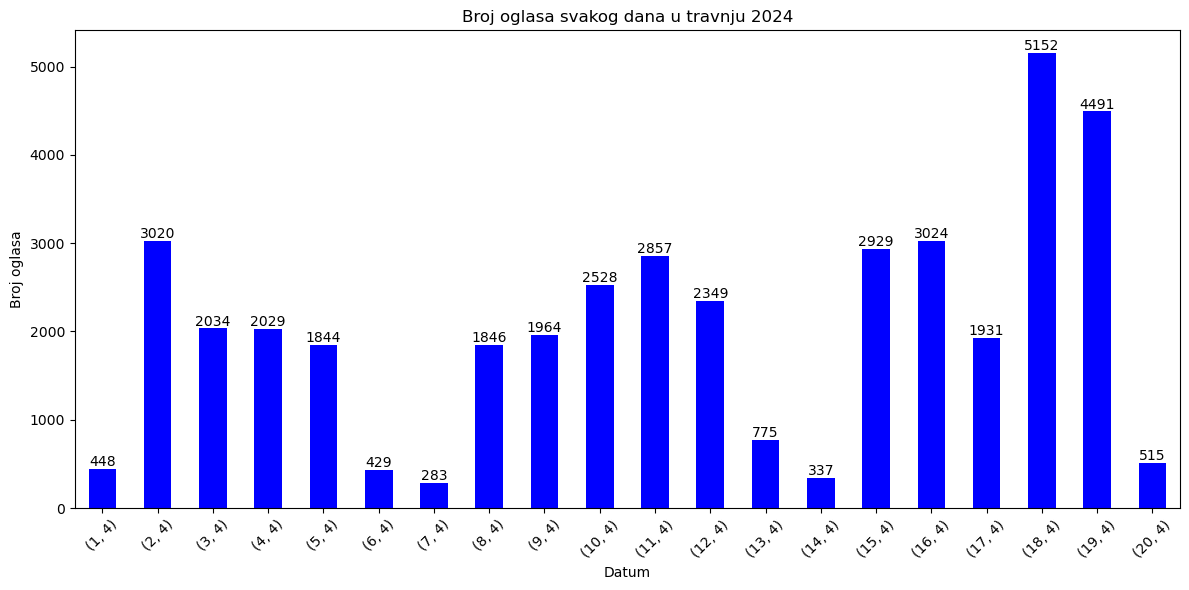

In [6]:
df['Date'] = pd.to_datetime(df['Date'].str.rstrip('.'), format='%d.%m.%Y')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df_april = df[(df['Year'] == 2024) & (df['Month'] == 4)]

listings_per_day = df_april.groupby(['Day', 'Month']).size()

plt.figure(figsize=(12, 6))
ax = listings_per_day.plot(kind='bar', color='b')
plt.xlabel('Datum')
plt.ylabel('Broj oglasa')
plt.title('Broj oglasa svakog dana u travnju 2024')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## 5. Cijena kvadratnog metra tijekom vremena

Grupirali smo podatke prema godini i mjesecu kako bismo istražili trendove u cijenama kroz vrijeme. Rezultate smo vizualizirali koristeći linijski dijagram, gdje je na osi X prikazano vrijeme (godina-mjesec), a na osi Y medijan cijene po kvadratnom metru.

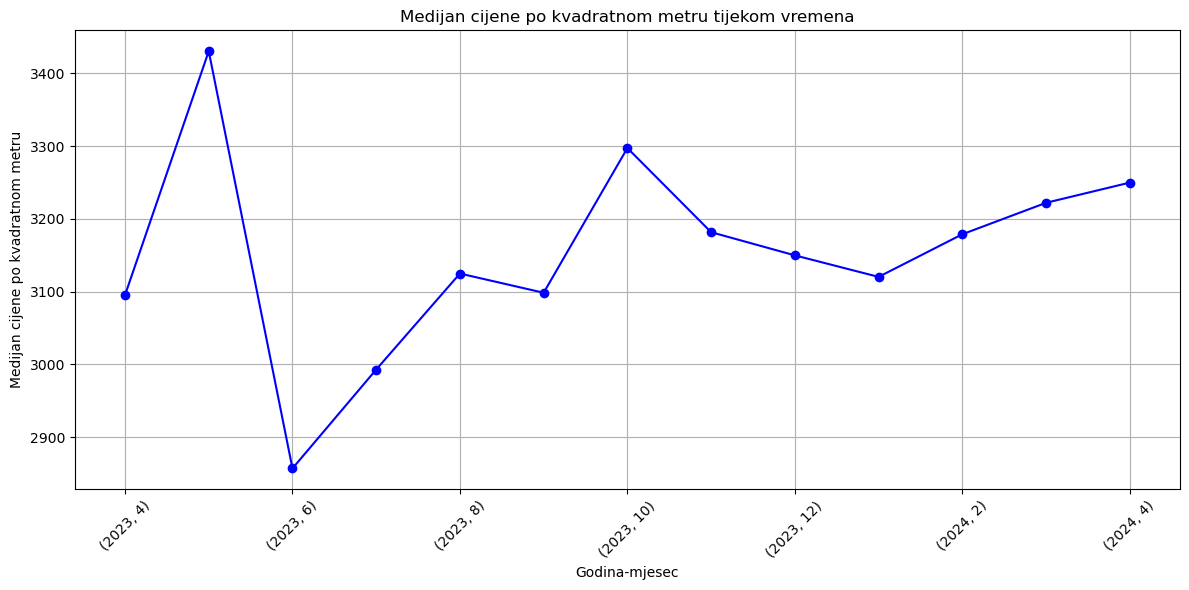

In [7]:
year_month_counts = df.groupby(['Year', 'Month']).size()

valid_year_months = year_month_counts[year_month_counts >= 100].index
df_filtered = df[df[['Year', 'Month']].apply(tuple, axis=1).isin(valid_year_months)]
median_price_per_sqm_year_month = df_filtered.groupby(['Year', 'Month'])['Price per sqm'].median()

plt.figure(figsize=(12, 6))
median_price_per_sqm_year_month.plot(marker='o', color='b', linestyle='-')
plt.xlabel('Godina-mjesec')
plt.ylabel('Medijan cijene po kvadratnom metru')
plt.title('Medijan cijene po kvadratnom metru tijekom vremena')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## 6. Pristutnost stanova po sobama

Odabrali smo tri najčešća tipa stana po broja soba. Ostala pojavljivanja grupirali smo pod "Ostalo" kako bismo dobili jasniju vizualizaciju. Rezultate smo prikazali kružnim dijagramom, gdje su prikazani udjeli svake kategorije u ukupnom broju stanova.

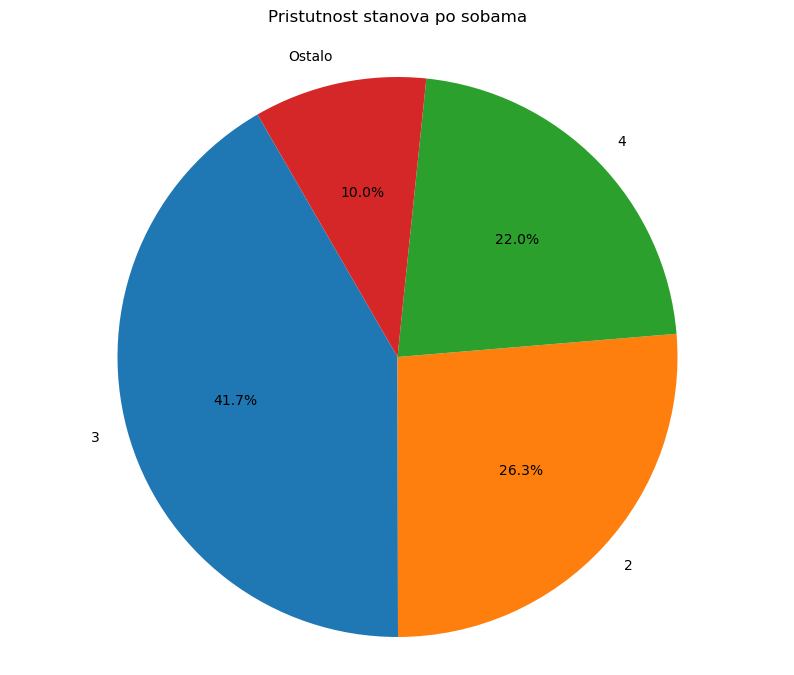

In [8]:
data = df[df['Number of rooms'] != 'Unknown']
number_of_rooms_counts = data['Number of rooms'].value_counts()

top_three = number_of_rooms_counts.head(3)
others_percentage = number_of_rooms_counts[3:].sum()
occurrences = pd.concat([top_three, pd.Series([others_percentage], index=['Ostalo'])])

plt.figure(figsize=(10, 8))
plt.pie(occurrences, labels=occurrences.index, autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=120)
plt.axis('equal')
plt.title('Pristutnost stanova po sobama', pad=20)
plt.show()

## 7. Energetska učinkovitost

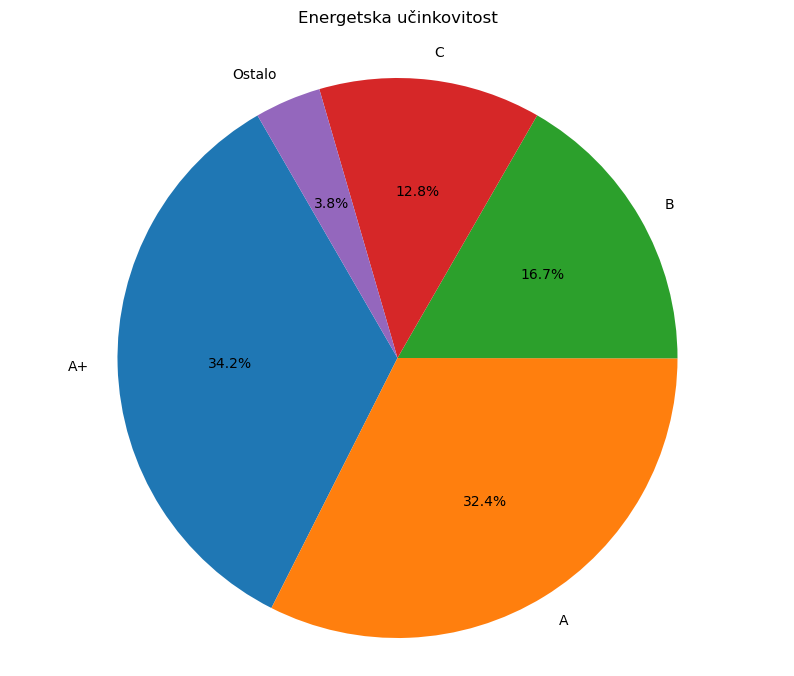

In [9]:
data = df[df['Energy class'] != 'Unknown']
energy_class_counts = data['Energy class'].value_counts()

top_three = energy_class_counts.head(4)
others_percentage = energy_class_counts[4:].sum()
occurrences = pd.concat([top_three, pd.Series([others_percentage], index=['Ostalo'])])

plt.figure(figsize=(10, 8))
plt.pie(occurrences, labels=occurrences.index, autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=120)
plt.axis('equal')
plt.title('Energetska učinkovitost', pad=20)
plt.show()

## 8. Izračunavanje medijana cijene po kvadratnom metru za svaki kat

Prvo smo filtrirali podatke kako bismo uklonili nevažeće ili nepoznate podatke o katovima. Zatim smo identificirali katove koji se pojavljuju u najmanje 100 oglasa kako bismo osigurali relevantnost podataka. Nakon filtriranja, grupirali smo podatke po katovima koristeći medijan cijenu za sortiranje od najskupljeg do najmanje skupog kata. Rezultate smo vizualizirali pomoću trakastog dijagrama, gdje su na osi X prikazani medijan cijene po kvadratnom metru, a na osi Y su katovi zgrada.

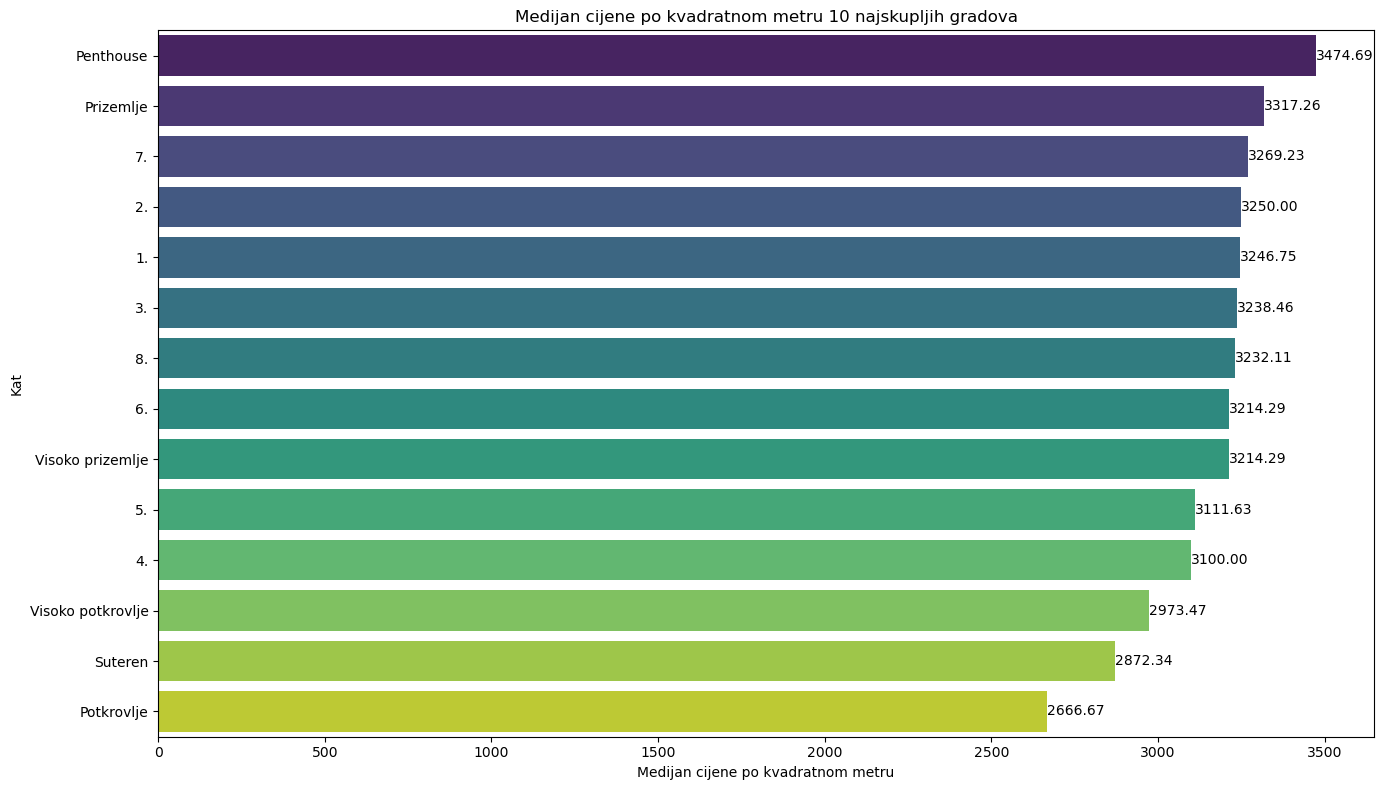

In [10]:
df = df[df['Floor'] != 'Unknown']
floor_counts = df['Floor'].value_counts()

valid_floors = floor_counts[floor_counts >= 100].index
df_filtered = df[df['Floor'].isin(valid_floors)]

median_price_per_sqm_city = df_filtered.groupby('Floor')['Price per sqm'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_price_per_sqm_city.values, y=median_price_per_sqm_city.index, palette='viridis')
for index, value in enumerate(median_price_per_sqm_city.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)
plt.xlabel('Medijan cijene po kvadratnom metru')
plt.ylabel('Kat')
plt.title('Medijan cijene po kvadratnom metru 10 najskupljih gradova')
plt.tight_layout()
plt.show()

# Statistički pregled stanova u Splitskoj-dalmatinskoj županiji

## 1.Izračunavanje medijana cijene po kvadratnom metru kvartova u gradu Splitu

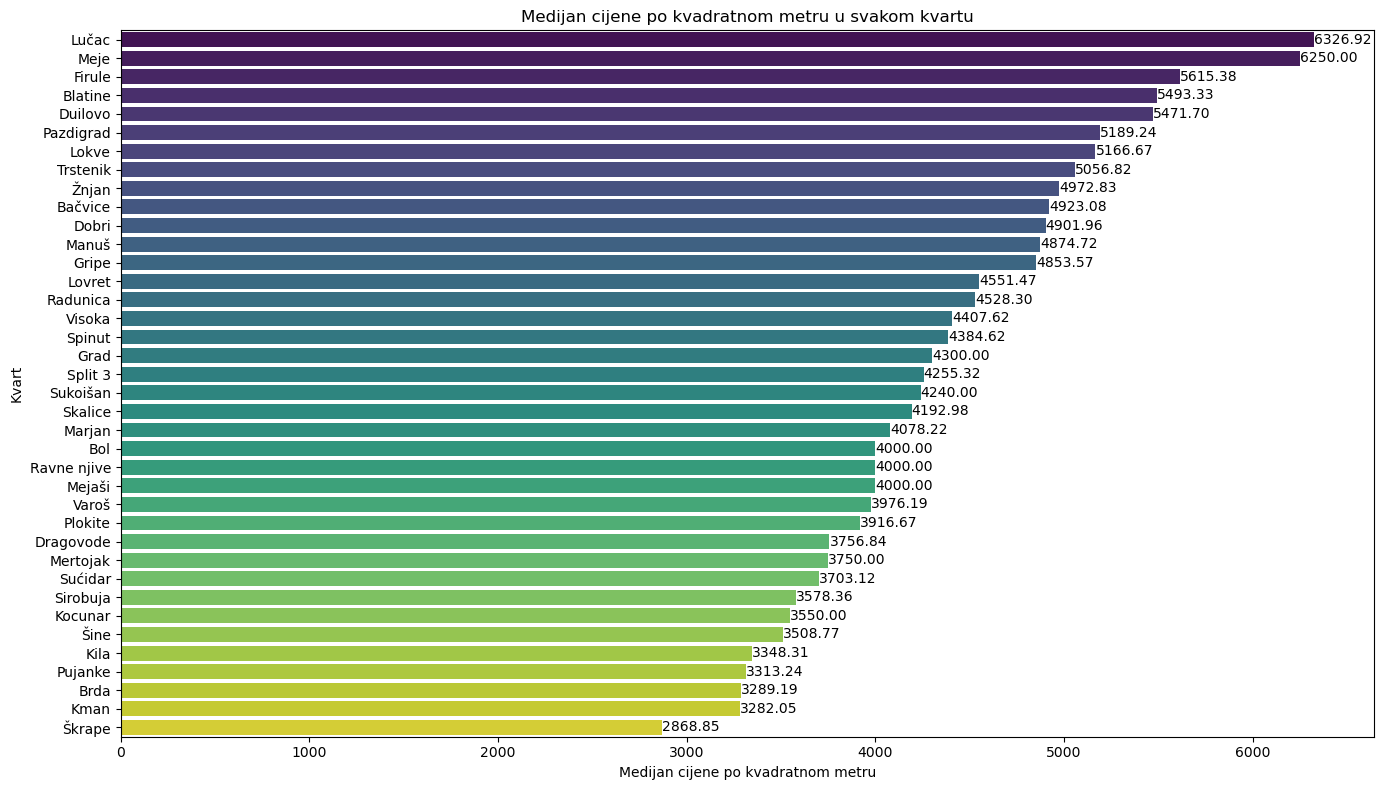

In [11]:
split_data = df[df['City'] == 'Split']
neighborhood_counts = split_data['Neighborhood'].value_counts()

valid_neighborhoods = neighborhood_counts[neighborhood_counts >= 5].index
df_filtered = df[df['Neighborhood'].isin(valid_neighborhoods)]

median_price_per_sqm_neighborhood = df_filtered.groupby('Neighborhood')['Price per sqm'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_price_per_sqm_neighborhood.values, y=median_price_per_sqm_neighborhood.index, palette='viridis')
for index, value in enumerate(median_price_per_sqm_neighborhood.values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)
plt.xlabel('Medijan cijene po kvadratnom metru')
plt.ylabel('Kvart')
plt.title('Medijan cijene po kvadratnom metru u svakom kvartu')
plt.tight_layout()
plt.show()

## 2. Traženje povoljnih novogradnji u gradu Splitu

Provjerili smo godinu izgradnje kako bismo uklonili nevažeće ili nepotpune podatke. Zatim smo identificirali novogradnje (stanove izgrađene u rasponu od 2000. do 2025. godine). Konačno, sortirali smo podatke po cijeni po kvadratnom metru te izdvojili 10 najpovoljnijih stanova.

In [12]:
df_split = df[df['City'] == 'Split'].copy()

df_split.loc[:, 'Year of construction'] = pd.to_numeric(df_split['Year of construction'], errors='coerce')
df_split = df_split.dropna(subset=['Year of construction'])
df_split = df_split[df_split['Year of construction'].between(2000, 2025)]
df_split.loc[:, 'Year of construction'] = df_split['Year of construction'].astype(str)

df_cheapest = df_split.sort_values(by='Price per sqm', ascending=True)

for index, row in df_cheapest[['Url', 'Price per sqm']].head(10).iterrows():
    print("URL:", row['Url'])
    print("Price per sqm:", row['Price per sqm'])

URL: https://www.njuskalo.hr/nekretnine/prodaja-stanova-novogradnji-kljuc-ruke-bez-agencijske-provizije-oglas-43289555
Price per sqm: 2902.777777777778
URL: https://www.njuskalo.hr/nekretnine/prodaja-stanova-novogradnji-kljuc-ruke-bez-agencijske-provizije-oglas-43289556
Price per sqm: 2923.076923076923
URL: https://www.njuskalo.hr/nekretnine/stan-split-78.00-m2-novogradnja-oglas-41468293
Price per sqm: 3012.8205128205127
URL: https://www.njuskalo.hr/nekretnine/stan-split-84.00-m2-mejasi-namjesten-stan-novo-oglas-42772720
Price per sqm: 3053.5714285714284
URL: https://www.njuskalo.hr/nekretnine/ekskluzivna-prodaja-novogradnje-sirobuji-oglas-43160310
Price per sqm: 3134.6153846153848
URL: https://www.njuskalo.hr/nekretnine/prodaja-stanova-novogradnji-kljuc-ruke-bez-agencijske-provizije-oglas-43289554
Price per sqm: 3211.2676056338028
URL: https://www.njuskalo.hr/nekretnine/dvosobni-stan-kila-79m2-oglas-42584901
Price per sqm: 3227.8481012658226
URL: https://www.njuskalo.hr/nekretnine/nov